### __Exploratory Data Analysis (EDA) Strategy for Audio Emotion Data__

**1. Data Collection and Initial Preparation:**
   - **Loading Data**: The process begins by loading audio files from a specified directory. Each audio file corresponds to an emotion category, with the data organized by directories named after the emotions.
   - **Labeling**: Each audio file is assigned a numerical label based on its corresponding emotion. This helps in organizing the data and preparing it for further analysis.

**2. Data Cleaning:**
   - **Noise Reduction**: To enhance the quality of the audio data, noise reduction techniques are applied. This step is crucial as it helps in removing unwanted noise from the recordings, making the subsequent analysis more accurate.
   - **Silence Trimming**: Silence at the beginning and end of the audio files is trimmed to ensure that the analysis focuses on the relevant parts of the audio. This is done to remove any non-informative segments.

**3. Exploratory Data Analysis (EDA):**
   - **Emotion Distribution**: A bar plot is created to visualize the distribution of audio samples across different emotions. This provides insight into the balance of the dataset and helps in identifying any biases or imbalances.
   - **Waveplots and Spectrograms**: 
     - **Waveplots**: For each emotion, an example audio file is selected, and its waveform is plotted. This visualization helps in understanding the general shape and structure of the audio signal.
     - **Spectrograms**: The spectrogram of each example audio is also plotted. Spectrograms visualize how the frequency content of the audio signal varies over time, providing insight into the audio's acoustic properties.
   - **Audio Length Statistics**: The duration of each audio file is calculated and analyzed. By grouping the data by emotion, summary statistics (such as mean, standard deviation, etc.) are computed to understand the distribution of audio lengths for each emotion.


In [3]:
# Importing the Classes from main.py
from main import DataLoader, DataCleaner, EDA, DataSaver, FeaturesEDA 

Number of .wav files in sad folder: 202
Number of .wav files in happy folder: 187
Number of .wav files in angry folder: 208
Number of .wav files in calm folder: 254
Number of .wav files in surprised folder: 192
Number of recordings for emotion 'sad': 202
Number of recordings for emotion 'happy': 187
Number of recordings for emotion 'angry': 208
Number of recordings for emotion 'calm': 254
Number of recordings for emotion 'surprised': 192
Gender counts: {'Female': 579, 'Male': 464, 'Unknown': 0}


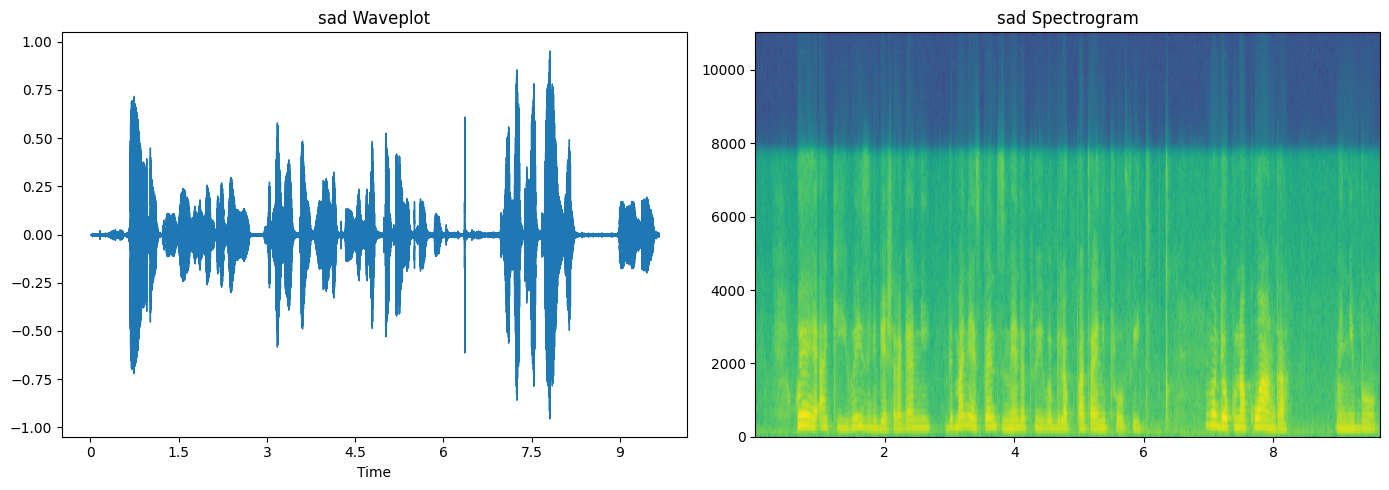

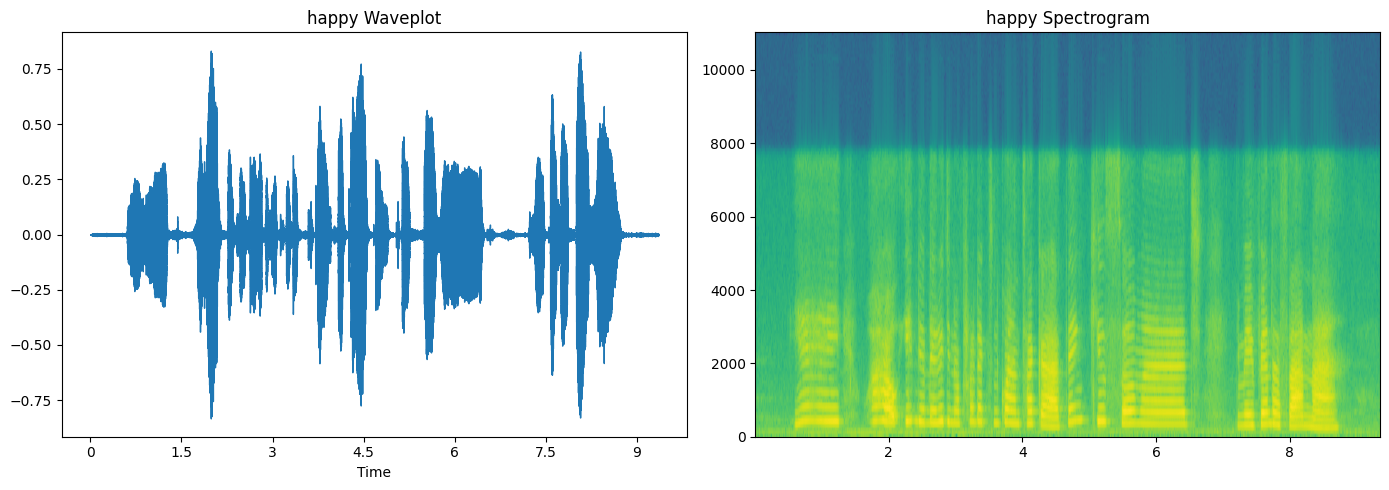

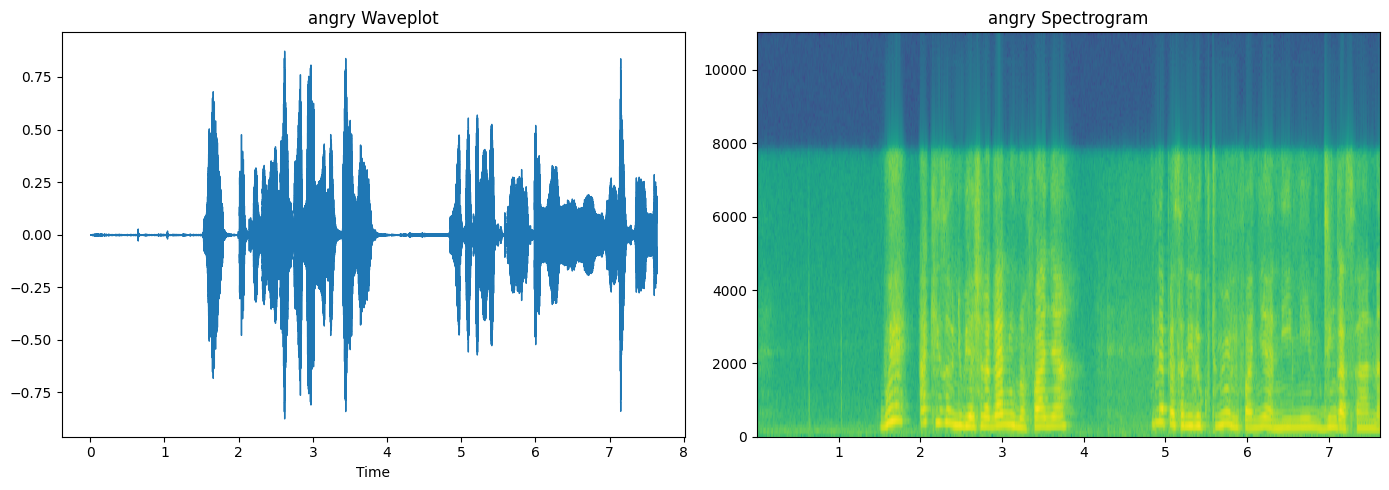

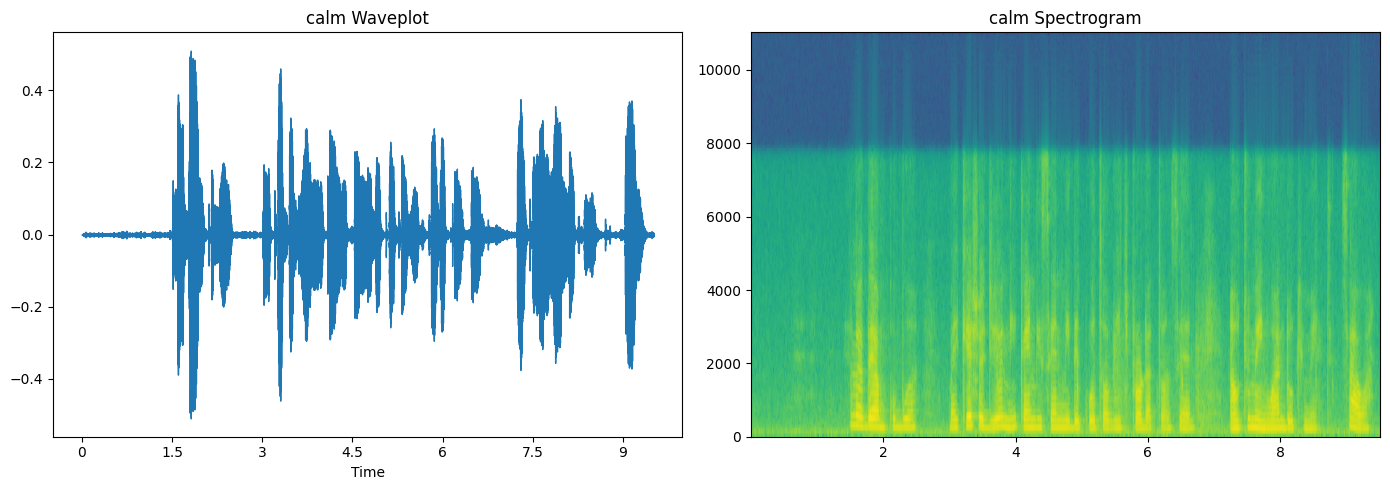

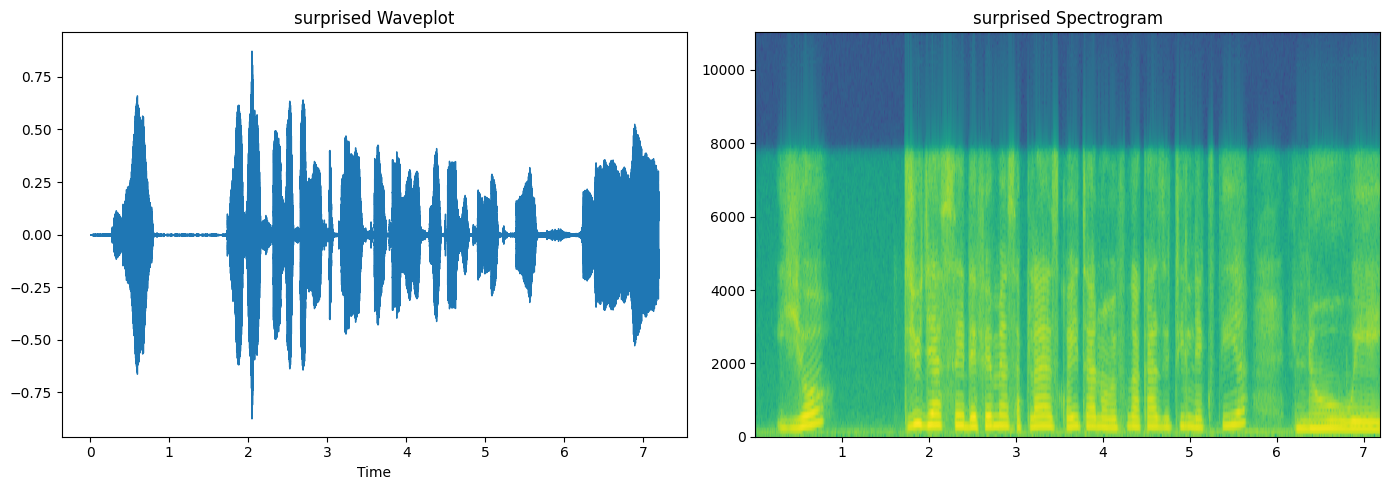

Audio length statistics per emotion:
sad: {'mean': 9.653514739229024, 'std': 0.0, 'min': 9.653514739229024, 'max': 9.653514739229024, 'median': 9.653514739229024}
happy: {'mean': 9.353514739229025, 'std': 0.0, 'min': 9.353514739229025, 'max': 9.353514739229025, 'median': 9.353514739229025}
angry: {'mean': 7.633514739229025, 'std': 0.0, 'min': 7.633514739229025, 'max': 7.633514739229025, 'median': 7.633514739229025}
calm: {'mean': 9.513514739229025, 'std': 0.0, 'min': 9.513514739229025, 'max': 9.513514739229025, 'median': 9.513514739229025}
surprised: {'mean': 7.193514739229025, 'std': 0.0, 'min': 7.193514739229025, 'max': 7.193514739229025, 'median': 7.193514739229025}


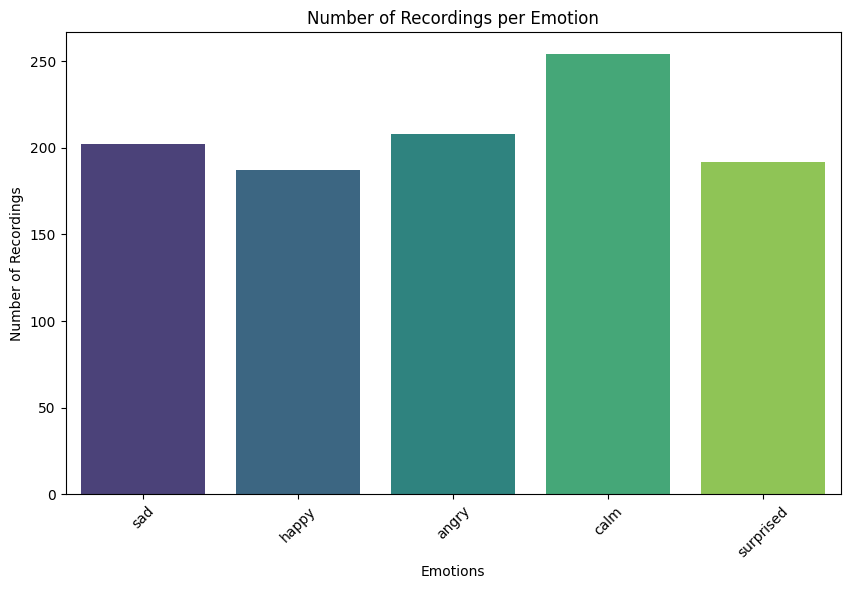

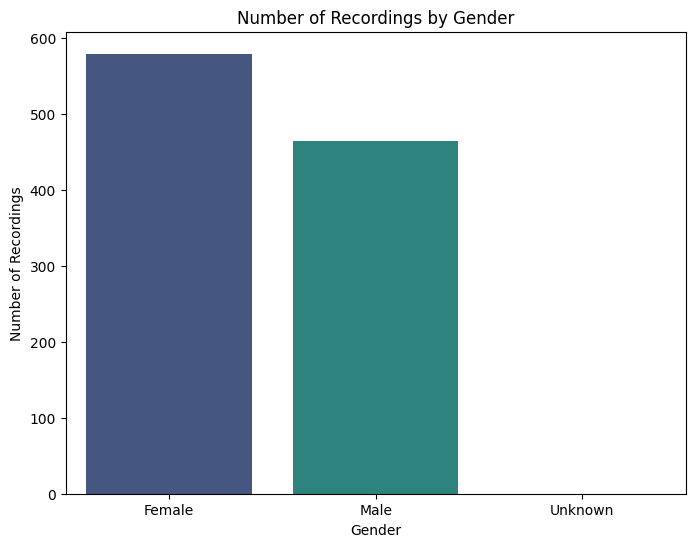

In [4]:
# Specify data directory
data_dir = "data"
emotions = ["sad", "happy", "angry", "calm", "surprised"]
# Initialize DataLoader
data_loader = DataLoader(data_dir=data_dir, emotions=emotions)
data_loader.load_data()

# Initialize DataCleaner
sample_rate = 22050  # Sample rate used in the dataset
data_cleaner = DataCleaner(X=data_loader.X, sample_rate=sample_rate)
cleaned_X = data_cleaner.clean_data()

# Initialize EDA
eda = EDA(X=cleaned_X, y=data_loader.y, sample_rate=sample_rate, data_dir=data_dir, emotions=emotions)

# Perform EDA
eda.count_recordings_per_emotion()
eda.count_genders()
eda.plot_waveplots_and_spectrograms()
eda.compute_audio_length_statistics()
eda.visualize_emotion_distribution()
eda.visualize_gender_distribution()


Processing 202 files for emotion: sad
Processing 175 files for emotion: happy
Processing 180 files for emotion: surprised
Processing 193 files for emotion: angry
Processing 186 files for emotion: calm
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 38 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   0        936 non-null    float64
 1   1        936 non-null    float64
 2   2        936 non-null    float64
 3   3        936 non-null    float64
 4   4        936 non-null    float64
 5   5        936 non-null    float64
 6   6        936 non-null    float64
 7   7        936 non-null    float64
 8   8        936 non-null    float64
 9   9        936 non-null    float64
 10  10       936 non-null    float64
 11  11       936 non-null    float64
 12  12       936 non-null    float64
 13  13       936 non-null    float64
 14  14       936 non-null    float64
 15  15       936 non-null    fl

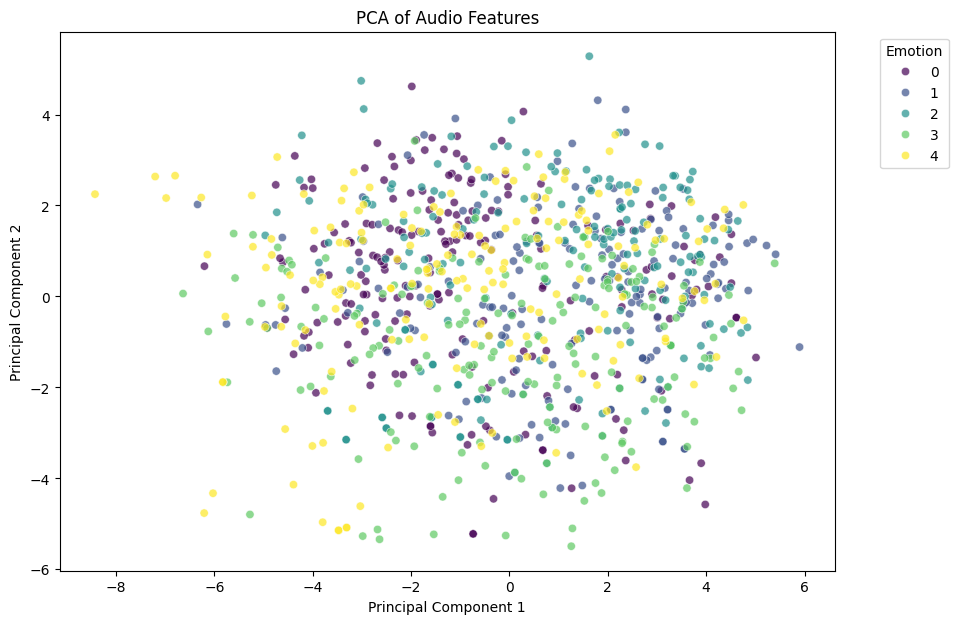

PCA Explained Variance Ratio: [0.19862142 0.10393044]
PCA Explained Variance Ratio (Cumulative): [0.19862142 0.30255186]


In [3]:
# Initialize FeaturesEDA
features_eda = FeaturesEDA(data_dir='data', emotions=['sad', 'happy', 'surprised', 'angry', 'calm'], 
                           sample_rate=22050, target_length=16000, 
                           n_mfcc=13, save_path='processed_data.csv', verbose=True)

# Perform exploratory data analysis
features_eda.get_info()
features_eda.get_statistics()
features_eda.get_head_tail()
# features_eda.plot_correlation_matrix()
features_eda.perform_pca()


#### __Key Observations:__

1. Dimensionality Reduction: PCA has reduced the audio features to two principal components (PC1 and PC2), which capture the most significant variance in the data. This dimensionality reduction allows for a visual representation of the data in a two-dimensional space, making it easier to understand the relationships between the different emotions and the audio features.

2. Emotion Clustering: While there is some overlap, different emotions tend to cluster in different regions of the plot. This suggests that the audio features carry information that is discriminative of emotional content. The clustering patterns reveal that certain emotions share similar acoustic characteristics, while others are more distinct. For example, the plot shows that emotions 1 and 2 tend to cluster together, indicating that they may share some common acoustic features. On the other hand, emotion 4 appears to be more distinct from the other emotions, suggesting that it has a unique set of acoustic characteristics.

3. Variance Explained: The spread of the data points along each principal component indicates how much variance in the original features is captured by that component. A larger spread implies greater variance explained. This means that the principal components that capture the most variance in the data are likely to be the most important for understanding the relationships between the different emotions and the audio features. For example, if the first principal component captures a large amount of variance, it is likely that this component is important for distinguishing between different emotions.